In [1]:
import os
os.environ['HTTP_PROXY'] = "http://127.0.0.1:10809"
os.environ['HTTPS_PROXY'] = "http://127.0.0.1:10809"

In [2]:
import geemap
import ee
Map=geemap.Map()
Map

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [3]:
# # 大庆市
# roi = ee.Geometry.Rectangle([123.9355, 45.8362,125.3055, 46.8762])
# # 天津市
# roi = ee.Geometry.Rectangle([115.9244, 38.6272,117.4944,39.6372])
# # 武汉市
# roi = ee.Geometry.Rectangle([113.7393, 29.8642,115.0993, 30.9242])
# # 珠三角
# roi = ee.Geometry.Rectangle([112.7614, 22.2347,114.0514, 23.2547])
# 青藏高原
roi = ee.Geometry.Rectangle([89.8826, 34.6579,91.3626, 35.8279])
Map.addLayer(roi, {}, "roi")
Map.centerObject(roi,7)

In [4]:
ref_image = ee.Image('LANDSAT/LC08/C01/T1_SR/LC08_139036_20200718')
visParams = {'bands': ['B5', 'B4', 'B3'],'min': 0,'max': 3000,'gamma': 1.4}
Map.addLayer(ref_image.clip(roi),visParams,'raw image')

In [5]:
classified_image = ee.Image('users/311605001111/classification_image_tibet_RF')
vis = {'min': 0,'max': 2,'palette':['#3CB371','#F5DEB3','#084081']}
Map.addLayer(classified_image,vis,'classified_image')

In [6]:
re = [91.3626, 34.6579, 89.8826, 35.5930]

# 分类结果

## 全局

Text(0.5, 1.0, 'Classification image')

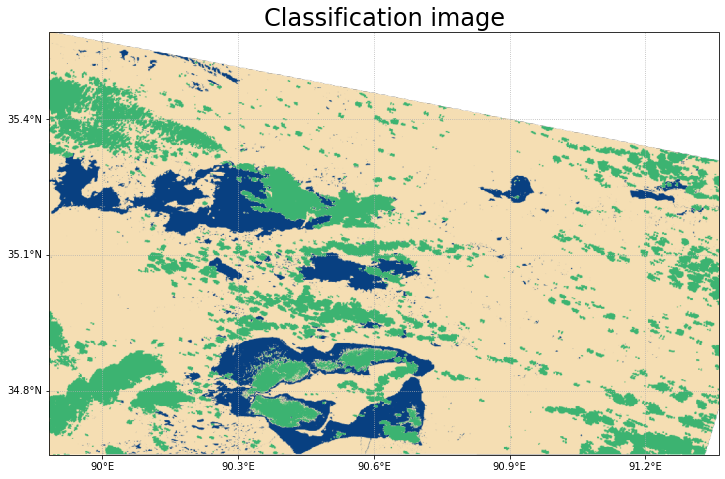

In [7]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
from geemap import cartoee

fig = plt.figure(figsize=(12, 8))
vis = {'min': 0,'max': 2,'palette':['#3CB371','#F5DEB3','#084081']}
# use cartoee to get a map
ax = cartoee.get_map(classified_image, region=re, vis_params=vis)
cartoee.add_gridlines(ax, interval=[0.3,0.3], linestyle=":")
ax.set_title(label = 'Classification image', fontsize=24)

## 水体

Text(0.5, 1.0, 'Water extent in classification image')

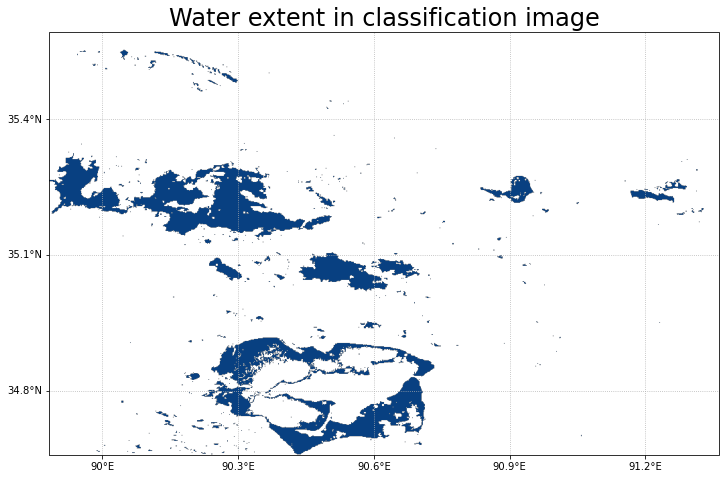

In [8]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
from geemap import cartoee

fig = plt.figure(figsize=(12, 8))
vis = {'palette':['#084081']}
# use cartoee to get a map
ax = cartoee.get_map(classified_image.eq(2).selfMask(), region=re, vis_params=vis)
cartoee.add_gridlines(ax, interval=[0.3,0.3], linestyle=":")
ax.set_title(label = 'Water extent in classification image', fontsize=24)

## 无效像元

Text(0.5, 1.0, 'Invalid pixels extent in classification image')

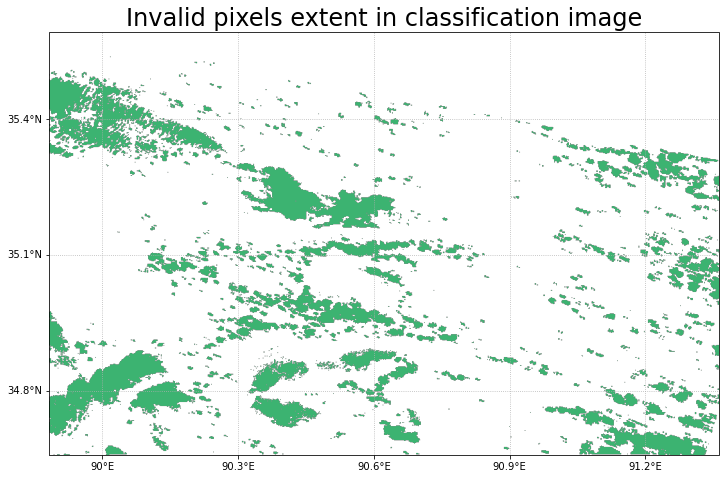

In [9]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
from geemap import cartoee

fig = plt.figure(figsize=(12, 8))
vis = {'palette':['#3CB371']}
# use cartoee to get a map
ax = cartoee.get_map(classified_image.eq(0).selfMask(), region=re, vis_params=vis)
cartoee.add_gridlines(ax, interval=[0.3,0.3], linestyle=":")
ax.set_title(label = 'Invalid pixels extent in classification image', fontsize=24)

# 水体频率

## 全局

In [ ]:
# 制图
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
from geemap import cartoee

fig = plt.figure(figsize=(12, 8))
# visualization_occurrence = {'bands': ['occurrence'],'min': 0.0,'max': 100.0,'palette': ['green', 'yellow', 'red']}
visualization_occurrence = {'bands': ['occurrence'],'min': 0.0,'max': 100.0,'palette': ['#FFFFFF','#0000FF']}

# use cartoee to get a map
basemap = ee.Image.constant(0).clip(ee.Geometry.Rectangle(re)).rename('occurrence').toFloat()
occurrence = ee.Image('JRC/GSW1_3/GlobalSurfaceWater').select('occurrence').updateMask(classified_image.gte(0))
occ = ee.ImageCollection([basemap,occurrence]).sum()
ax = cartoee.get_map(occ, region=re, vis_params=visualization_occurrence)
cartoee.add_gridlines(ax, interval=[0.3,0.3], linestyle=":")
cartoee.add_colorbar(ax, {'min': 0,'max': 100,'palette':['#FFFFFF','#0000FF']},cmap = 'Blues',loc="right",label="water occurrence", orientation="vertical")
ax.set_title(label = 'Water occurrence', fontsize=24)

In [ ]:
# 制图--v2
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
from geemap import cartoee

fig = plt.figure(figsize=(12, 8))
# visualization_occurrence = {'bands': ['occurrence'],'min': 0.0,'max': 100.0,'palette': ['green', 'yellow', 'red']}
visualization_occurrence = {'bands': ['occurrence'],'min': 0.0,'max': 100.0,'palette': ['#FFFFFF','#0000FF']}

# use cartoee to get a map
basemap = ee.Image.constant(0).clip(ee.Geometry.Rectangle(re)).rename('occurrence')
occurrence = ee.Image('JRC/GSW1_3/GlobalSurfaceWater').select('occurrence').updateMask(classified_image.gte(0))
occ = ee.ImageCollection(basemap,occurrence).sum()
ax = cartoee.get_map(occurrence, region=re, vis_params=visualization_occurrence)
cartoee.add_gridlines(ax, interval=[0.3,0.3], linestyle=":")
ax.set_title(label = 'Water occurrence', fontsize=24)

## 水体

In [ ]:
# 制图
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
from geemap import cartoee

fig = plt.figure(figsize=(12, 8))
# visualization_occurrence = {'bands': ['occurrence'],'min': 0.0,'max': 100.0,'palette': ['green', 'yellow', 'red']}
visualization_occurrence = {'bands': ['occurrence'],'min': 0.0,'max': 100.0,'palette': ['#FFFFFF','#0000FF']}

# use cartoee to get a map
basemap = ee.Image.constant(0).clip(ee.Geometry.Rectangle(re)).rename('occurrence').toFloat()
occurrence = ee.Image('JRC/GSW1_3/GlobalSurfaceWater').select('occurrence').updateMask(classified_image.eq(2))
occ = ee.ImageCollection([basemap,occurrence]).sum()
ax = cartoee.get_map(occ, region=re, vis_params=visualization_occurrence)
cartoee.add_gridlines(ax, interval=[0.3,0.3], linestyle=":")
cartoee.add_colorbar(ax, {'min': 0,'max': 100,'palette':['#FFFFFF','#0000FF']},cmap = 'Blues',loc="right",label="water occurrence", orientation="vertical")
ax.set_title(label = 'Water occurrence in water extent', fontsize=24)

## 无效像元

In [ ]:
# 制图
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
from geemap import cartoee

fig = plt.figure(figsize=(12, 8))
# visualization_occurrence = {'bands': ['occurrence'],'min': 0.0,'max': 100.0,'palette': ['green', 'yellow', 'red']}
visualization_occurrence = {'bands': ['occurrence'],'min': 0.0,'max': 100.0,'palette': ['#FFFFFF','#0000FF']}

# use cartoee to get a map
basemap = ee.Image.constant(0).clip(ee.Geometry.Rectangle(re)).rename('occurrence').toFloat()
occurrence = ee.Image('JRC/GSW1_3/GlobalSurfaceWater').select('occurrence').updateMask(classified_image.eq(0))
occ = ee.ImageCollection([basemap,occurrence]).sum()
ax = cartoee.get_map(occ, region=re, vis_params=visualization_occurrence)
cartoee.add_gridlines(ax, interval=[0.3,0.3], linestyle=":")
cartoee.add_colorbar(ax, {'min': 0,'max': 100,'palette':['#FFFFFF','#0000FF']},cmap = 'Blues',loc="right",label="water occurrence", orientation="vertical")
ax.set_title(label = 'Water occurrence in invalid pixels extent', fontsize=24)

# 增强的水体范围

In [10]:
occurrence = ee.Image('JRC/GSW1_3/GlobalSurfaceWater').select('occurrence')
occurrence_no_data = occurrence.updateMask(classified_image.eq(0).selfMask())
enhanced_image = occurrence_no_data.gte(7).selfMask().select('occurrence').rename('waterclass')
vis = {'palette':['#084081']}
Map.addLayer(enhanced_image,vis,'enhanced_image')

Text(0.5, 1.0, 'Enhanced water enxtent')

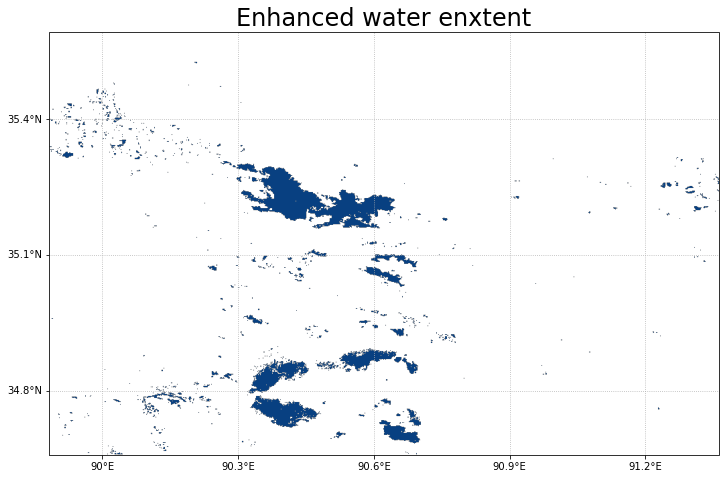

In [11]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
from geemap import cartoee

fig = plt.figure(figsize=(12, 8))
vis = {'palette':['#084081']}
# use cartoee to get a map
ax = cartoee.get_map(enhanced_image, region=re, vis_params=vis)
cartoee.add_gridlines(ax, interval=[0.3,0.3], linestyle=":")
ax.set_title(label = 'Enhanced water enxtent', fontsize=24)

# 增强后的水体范围

In [12]:
final_water_image = ee.Image('users/311605001111/enhance_image_tibet_8420')
vis = {'min': 0,'max': 1,'palette':['#F5DEB3','#084081']}
Map.addLayer(final_water_image,vis,'final_water_image')

Text(0.5, 1.0, 'Final water enxtent')

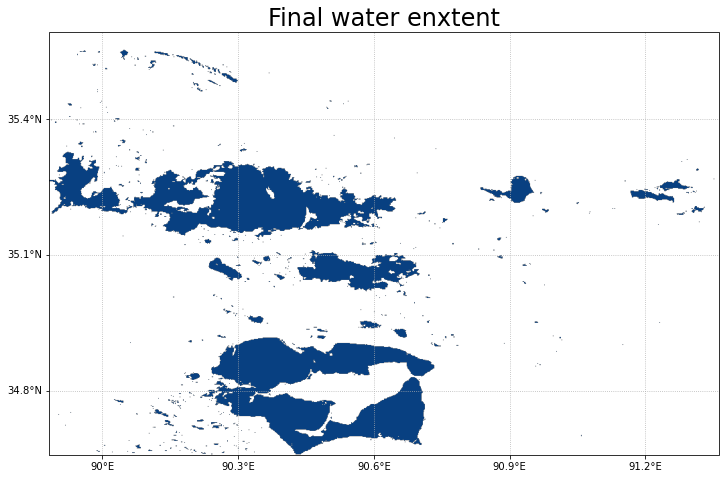

In [13]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
from geemap import cartoee

fig = plt.figure(figsize=(12, 8))
vis = {'palette':['#084081']}
# use cartoee to get a map
ax = cartoee.get_map(final_water_image.eq(1).selfMask(), region=re, vis_params=vis)
cartoee.add_gridlines(ax, interval=[0.3,0.3], linestyle=":")
ax.set_title(label = 'Final water enxtent', fontsize=24)

Text(0.5, 1.0, 'Final Classification result')

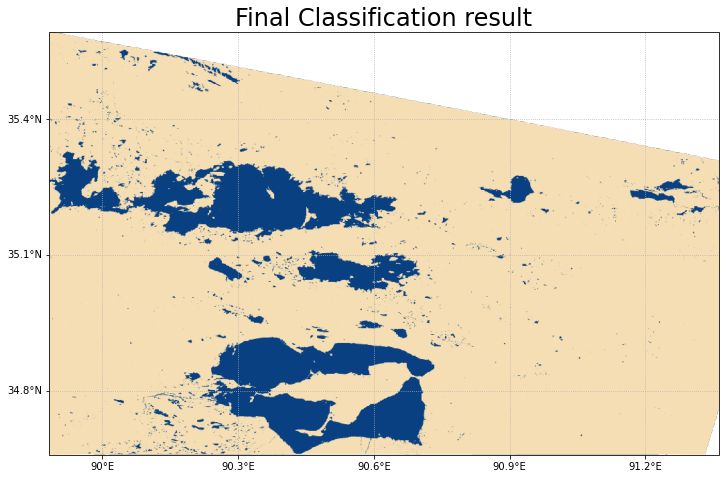

In [14]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
from geemap import cartoee

fig = plt.figure(figsize=(12, 8))
vis = {'min': 0,'max': 1,'palette':['#F5DEB3','#084081']}
# use cartoee to get a map
ax = cartoee.get_map(final_water_image, region=re, vis_params=vis)
cartoee.add_gridlines(ax, interval=[0.3,0.3], linestyle=":")
ax.set_title(label = 'Final Classification result', fontsize=24)

# 直方图

In [ ]:
classified_image = ee.Image('users/311605001111/classification_image_tibet_RF')
water = classified_image.eq(2).selfMask()
no_data = classified_image.eq(0).selfMask()
occurrence = ee.Image('JRC/GSW1_3/GlobalSurfaceWater').select('occurrence')
occurrence_water = occurrence.updateMask(water)
occurrence_no_data = occurrence.updateMask(no_data)
occurrence_HistogramCount = occurrence_water.reduceRegion(**{
    'reducer': ee.Reducer.histogram(100,1),
    'geometry': roi,
    'scale': 30,
    'bestEffort': True,
    'tileScale': 2,
})

In [ ]:
print(occurrence_HistogramCount.getInfo())

In [ ]:
# 直方图
# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

index = 'occurrence'
fig = plt.figure(figsize=(12, 8))

hist_dict = occurrence_HistogramCount.getInfo()
x = hist_dict[index]['bucketMeans']
y = hist_dict[index]['histogram']

plt.bar(x, y)
plt.xlim(-1,100)
plt.xlabel('Occurrence value',fontsize=18)
plt.ylabel('Pixel count',fontsize=18)
plt.title('Histogram statistics',fontsize=24)
plt.xticks(np.arange(0,101,10))
plt.tick_params(labelsize=14)
plt.show()